In [2]:
import numpy as np
import scipy as sp
from scipy.io import wavfile
import lovely_numpy as ln
import matplotlib.pyplot as plt
import json_tricks

In [3]:
!ls

config.yml  decompressed.wav  original.wav  sample.wav	task.ipynb  text.md


In [4]:
sample_rate, data = wavfile.read('sample.wav', mmap=True)
wavfile.write('original.wav', sample_rate, data)

# data = data.mean(axis=1)

In [5]:
print("ORIGINAL DATA")
print(ln.lovely(data))

data = data[:, 0] + data[:, 1] * 1.j
wavfile.write('original.wav', sample_rate, np.array([data.real, data.imag]).T)

ORIGINAL DATA
memmap[191027, 2] i16 n=382054 (0.7Mb) x∈[-20505, 26899] μ=-4.501 σ=2.685e+03


In [6]:
data

array([-25.-25.j, -24.-24.j, -23.-23.j, ..., -34.-34.j, -35.-35.j,
       -31.-31.j])

In [7]:
def compress(input, frequencies=1000):
    a = []
    ### YOUR CODE HERE ###
    
    fft_data = np.fft.fft(input)
    magnitude = np.abs(fft_data)
    largest_indices = np.argsort(magnitude)[-frequencies:]
    compressed = [(index, fft_data[index]) for index in largest_indices]

    return np.array(compressed)

def decompress(input, data_len=191027):
    ### YOUR CODE HERE ###
    
    fft_data = np.zeros(data_len, dtype=np.complex128)
    
    for index, value in input:
        fft_data[int(index)] = value
    
    res = np.fft.ifft(fft_data)
    

    return res

In [8]:
compressed = compress(data, frequencies=10000)

json_tricks.dump(compressed, '.answer.json')

decompressed = decompress(compressed)

print(ln.lovely(data))
print(ln.lovely(decompressed))

array([-25.-25.j, -24.-24.j, -23.-23.j, ..., -34.-34.j, -35.-35.j,
       -31.-31.j])
array([133.32177054+133.32177054j, 141.23382789+141.23382789j,
       163.05194488+163.05194488j, ..., 243.76148649+243.76148649j,
       187.63963436+187.63963436j, 148.40826848+148.40826848j])


/tmp/ipykernel_17874/2025975726.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_data[int(index)] = value


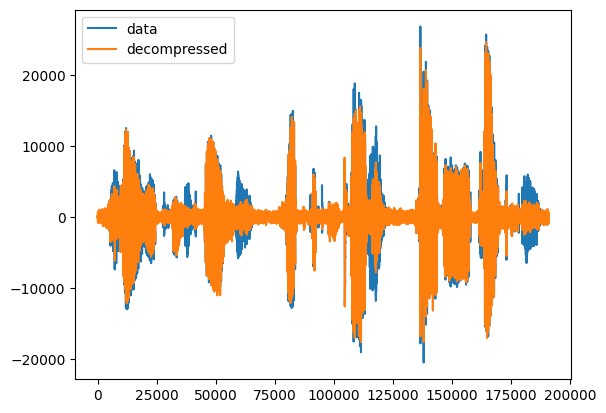

In [9]:
plt.plot(data.real, label='data')
plt.plot(decompressed.real,label='decompressed')
plt.legend()

In [10]:
wavfile.write('decompressed.wav', sample_rate, np.array([decompressed.real, decompressed.imag]).T.astype('int16'))

In [11]:
wavfile.write('original.wav', sample_rate, np.array([data.real, data.imag]).T.astype('int16'))

In [12]:
from IPython.display import Audio

Audio("decompressed.wav")

In [13]:
from IPython.display import Audio

Audio("sample.wav")

In [14]:
#How much can you compress the audio signal so that the difference is not heard?

Playing Original Audio:


Testing compression ratio: 0.01 (1910 frequencies retained)
Reconstructed audio saved to: reconstructed_1.wav
Playing audio for compression ratio 0.01


/tmp/ipykernel_17874/2025975726.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_data[int(index)] = value


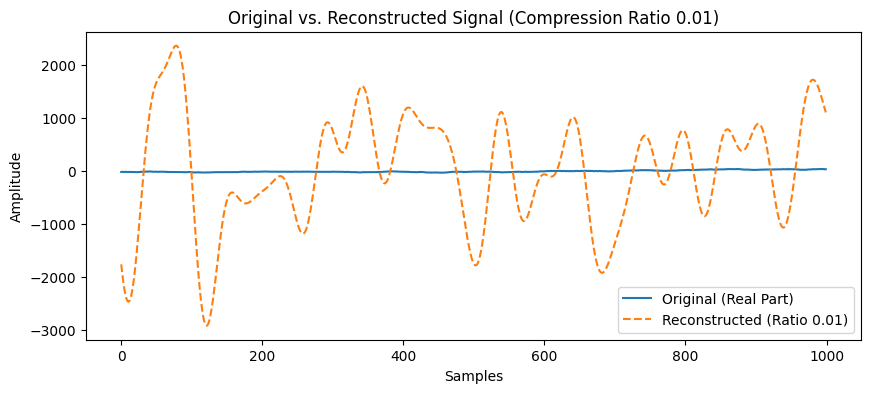

Testing compression ratio: 0.05 (9551 frequencies retained)
Reconstructed audio saved to: reconstructed_5.wav
Playing audio for compression ratio 0.05


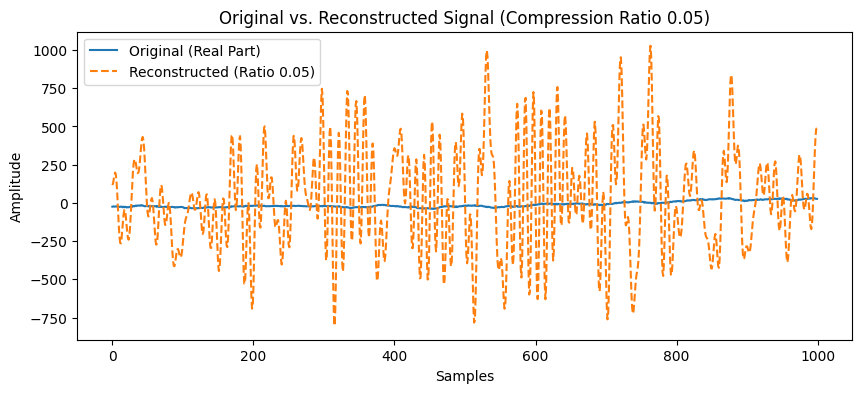

Testing compression ratio: 0.1 (19102 frequencies retained)
Reconstructed audio saved to: reconstructed_10.wav
Playing audio for compression ratio 0.1


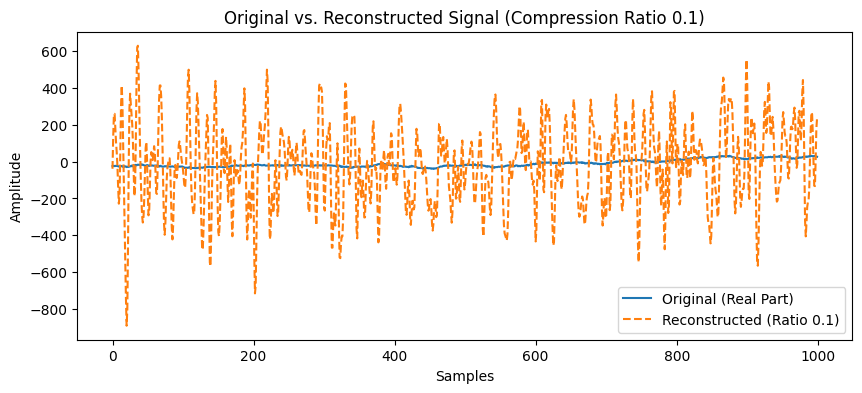

Testing compression ratio: 0.2 (38205 frequencies retained)
Reconstructed audio saved to: reconstructed_20.wav
Playing audio for compression ratio 0.2


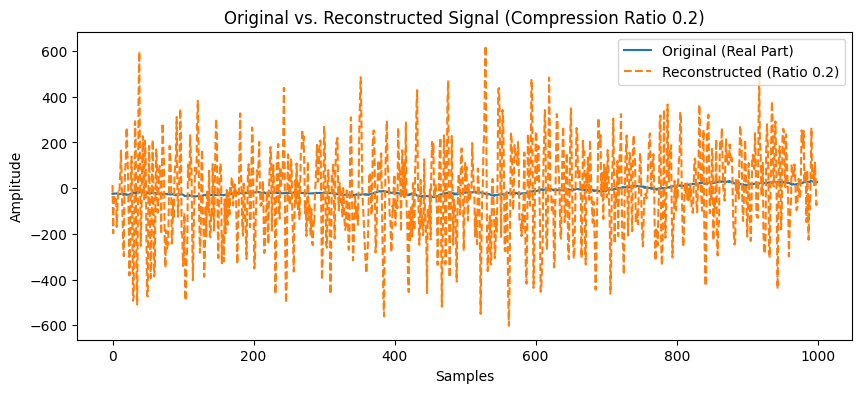

Testing compression ratio: 0.5 (95513 frequencies retained)
Reconstructed audio saved to: reconstructed_50.wav
Playing audio for compression ratio 0.5


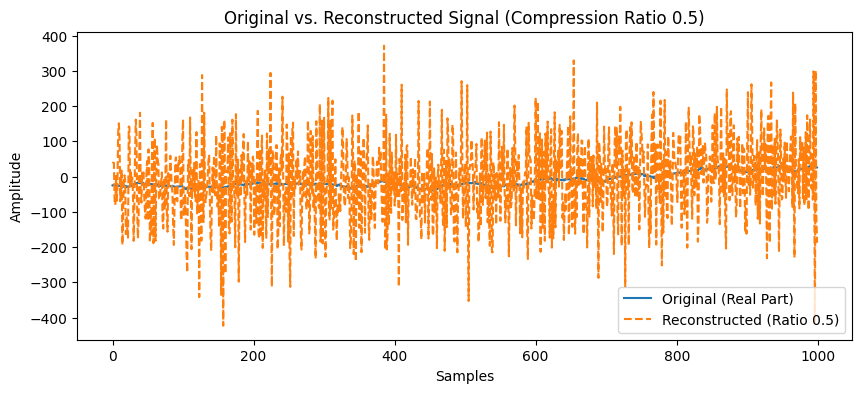

In [17]:
def test_compression_with_audio(input_signal, sample_rate, compression_ratios, output_dir="output"):

    total_frequencies = len(input_signal)
    for ratio in compression_ratios:
        frequencies_to_retain = int(total_frequencies * ratio)
        print(f"Testing compression ratio: {ratio} ({frequencies_to_retain} frequencies retained)")
        
        compressed_data = compress(input_signal, frequencies=frequencies_to_retain)
        
        reconstructed_signal = decompress(compressed_data, len(input_signal))
        
        # Save reconstructed signal
        stereo_reconstructed = np.array([reconstructed_signal.real, reconstructed_signal.imag]).T
        output_file = f"reconstructed_{int(ratio*100)}.wav"
        wavfile.write('decompressed.wav', sample_rate, np.array([decompressed.real, decompressed.imag]).T.astype('int16'))
        wavfile.write(output_file, sample_rate, stereo_reconstructed.astype(np.int16))
        print(f"Reconstructed audio saved to: {output_file}")
        
        # Play the reconstructed audio
        print(f"Playing audio for compression ratio {ratio}")
        display(Audio(output_file))
        
        # Visualize the signal
        plt.figure(figsize=(10, 4))
        plt.plot(input_signal.real[:1000], label="Original (Real Part)")
        plt.plot(reconstructed_signal.real[:1000], label=f"Reconstructed (Ratio {ratio})", linestyle='dashed')
        plt.legend()
        plt.title(f"Original vs. Reconstructed Signal (Compression Ratio {ratio})")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()



print("Playing Original Audio:")
display(Audio("sample.wav"))



compression_ratios = [0.01, 0.05, 0.1, 0.2, 0.5]

test_compression_with_audio(data, sample_rate, compression_ratios)



How much can you compress the audio signal so that the difference is not heard?
Ans: i think we can get rid of around 50-60% feq. with no heard difference 

How much can you compress the signal so that the information is still comprehensible?
Ans: i think we can get rid of around 95% feq. and we can still understand the words.